In [7]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [29]:
##SE DEBEN DE ACTULIZAR LOS PESOS DE ACUERDO ALA FUNCIÓN DE GRADIENTE DESCENDIENTE POR LO QUE PARA APLICAR A UNA REGRESIÓN DE 
#SEGUNDO ORDEN SE DEBE DE AJUSTAR EL CODIGO PARA QUE PUEDE RECIBIR LOS 2 PESOS Y EL BIAS DE ACUERDO AL CALCULO DE LA DERIVADA
#PARCIAL PARA CADA UNO ESTOS PARAMETROS
def update_w_and_b(X, y, w1, w2, b, alpha):
    dl_dw1 = 0.0
    dl_dw2=0.0
    dl_db = 0.0
    N = len(X)
    for i in range(N):
        dl_dw1 += -2*(pow(X[i],2))*(y[i] - (w1*(pow(X[i],2))+ w2*X[i] + b))
        dl_dw2 += -2*X[i]*(y[i] - (w1*(pow(X[i],2))+ w2*X[i] + b))
        dl_db += -2*(y[i] - (w1*(pow(X[i],2))+ w2*X[i] + b))
    w1 = w1 - (1/float(N))*dl_dw1*alpha
    w2 = w2 - (1/float(N))*dl_dw2*alpha
    b = b - (1/float(N))*dl_db*alpha
    return w1, w2, b

#SE CALCULA EL MSE, POR LO QUE SE MODIFICA LA FUNCIÓN TAL QUE PUEDA ACEPTA F(W1,W2,B)
def avg_loss(X, y, w1, w2, b):
    N = len(X)
    total_error = 0.0
    for i in range(N):
        total_error += (y[i] - (w1*(pow(X[i],2))+ w2*X[i] + b))**2
    return total_error / float(N)

#SE CREA UNA FUNCIÓN PARA ENTRENAR Y ENCONTRAR LOS VALORES OPTIMOS PARA LA REGRESIÓN DE SEGUNDO ORDEN AÑADIENDO LAS FUNCIONES
#PREVIAMENTE CREADAS PARA LA LA ACTUALIZACIÓN DE PESOS Y EL CALCULO DEL MSE, ADEMAS SE CREA UN VECTOR QUE ABARQUE LOS TODOS
#LOS PUNTOS ENTRE EL MINIMO Y EL MAXIMO DE X EN LA REGRESIÓN PARA PODER OBTENER LA FUNCIÓN DE ACUERDO A LOS PESOS QUE SE
#ENCUENTRAN ITERATIVAMENTE, ASI MISMO SE GUARDAN LOS MSE EN UN VECTOR PARA QUE AL FINAL DEL ENTRENAMIENTO SE PUEDA GRAFICAR
#COMO ES QUE SE COMPORTA EL MSE A TRAVES DE LOS EPOCHS
def train_and_plot(X, y, w1, w2, b, alpha, epochs):
    minimo=np.min(X)
    maximo=np.max(X)
    ndots=100
    X2=np.linspace(minimo,maximo,ndots)
    Error=[]
    for e in range(epochs):
        Y2=[]
        w1, w2, b = update_w_and_b(X, y, w1, w2, b, alpha)
        if e%100==0.0:
            avg_loss_ = avg_loss(X, y, w1, w2, b)
            Error.append(avg_loss_)
            for p in range(len(X2)):
                Y2.append(w1*(X2[p]**2)+ w2*X2[p] + b)
            plt.scatter(x=X,y=y)
            plt.plot(X2,Y2,c='r')
            plt.title("Epoch {} | Loss: {} | w1:{}, w2:{}, b:{}".format(e, round(avg_loss_,2), round(w1, 4),round(w2,4), round(b, 4)))
            plt.show()
    plt.plot(Error)
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('Mean Square Error')
    return w1, w2, b , Error

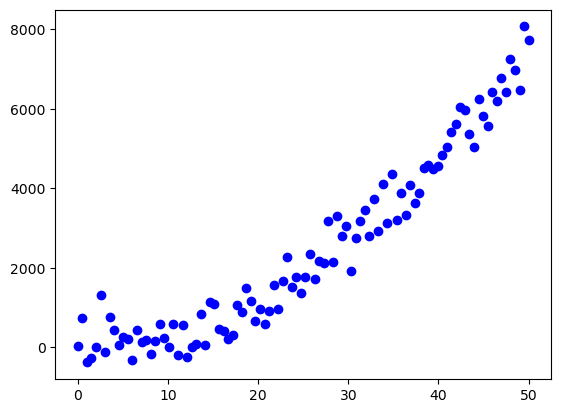

In [3]:
#SE CREA UNA FUNCIÓN DE PRUEBA DE SEGUNDO ORDEN CON LA QUE PUEDE ENTRENAR EL MODELO DE REGREIÓN DE SEGUNDO ORDEN CON LA 
#FINALIDAD DE VER PROBAR SI EL ALGORITMO FUNCIONA CORRECTAMENTE
def f2(x): # y = m*x^2 + b
  return 3*(x**2) +2*x- 20
xmin, xmax, npts = [0, 50, 100]
X = np.linspace(xmin, xmax, npts) 
y2 = f2(X) + np.random.normal(0,scale=400, size=np.shape(X))
plt.scatter(X, y2, marker='o', c='b')

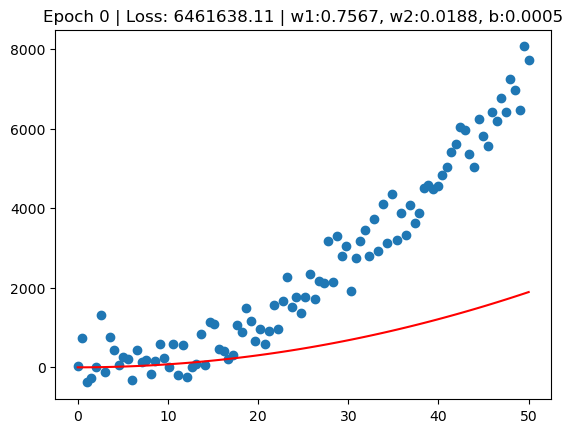

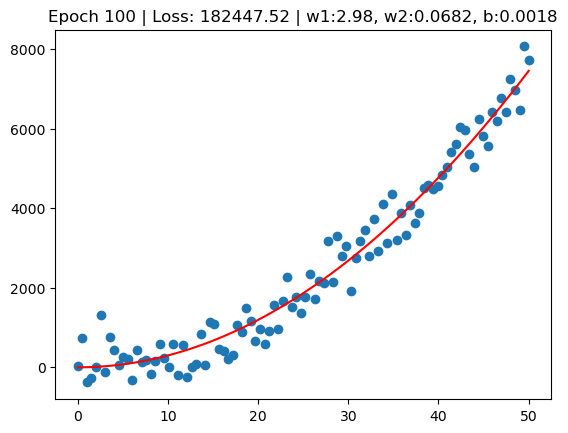

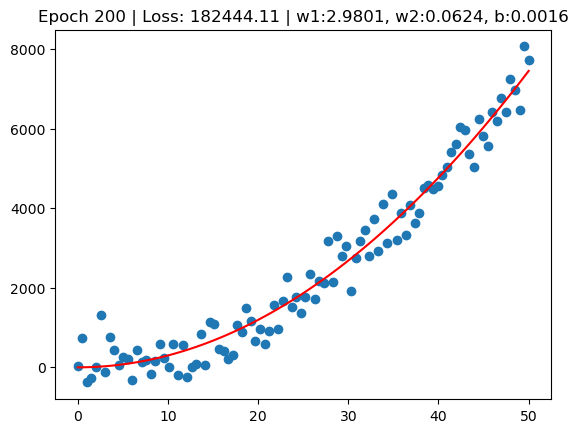

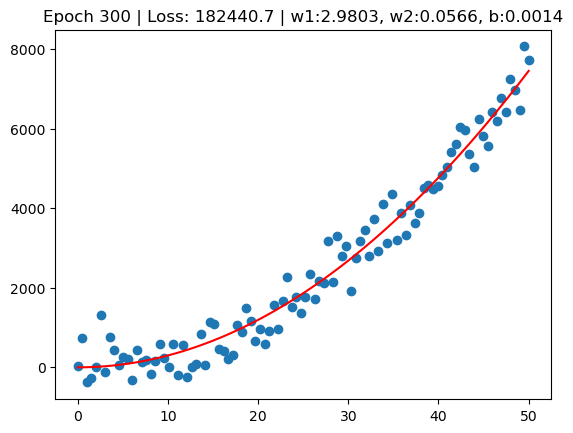

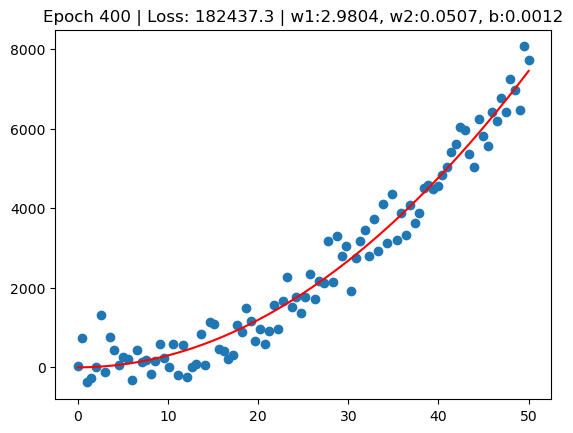

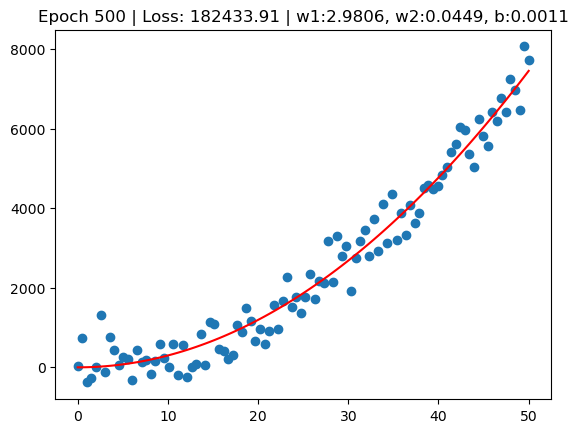

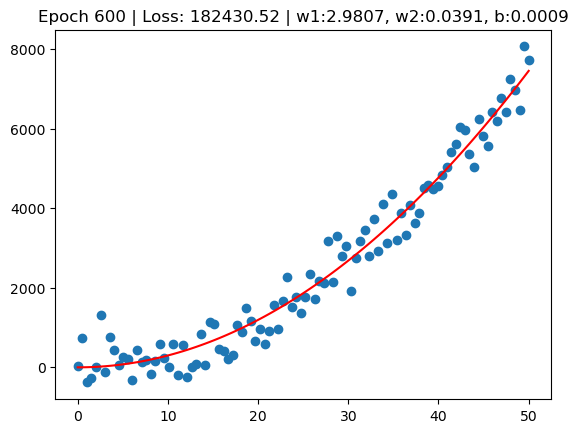

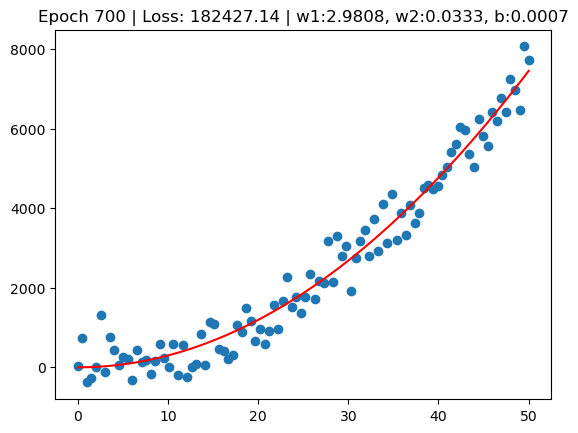

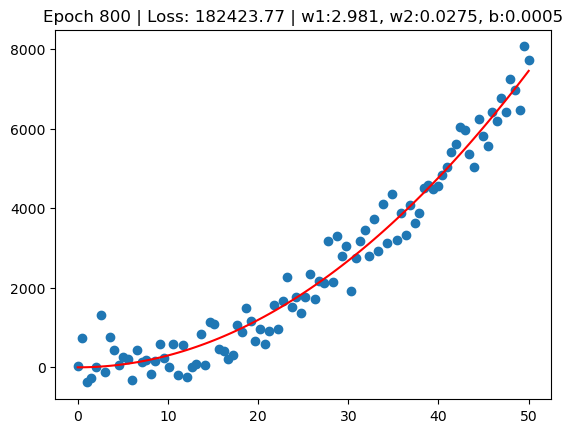

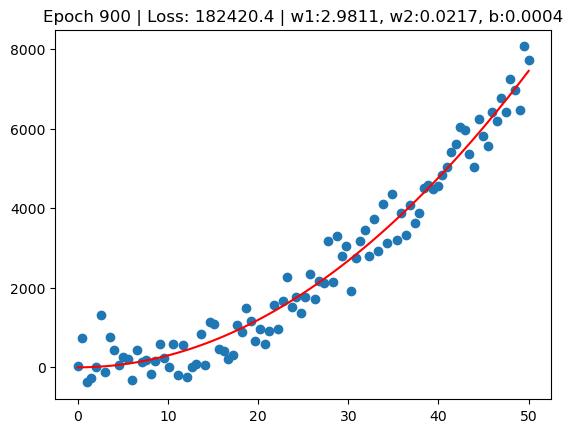

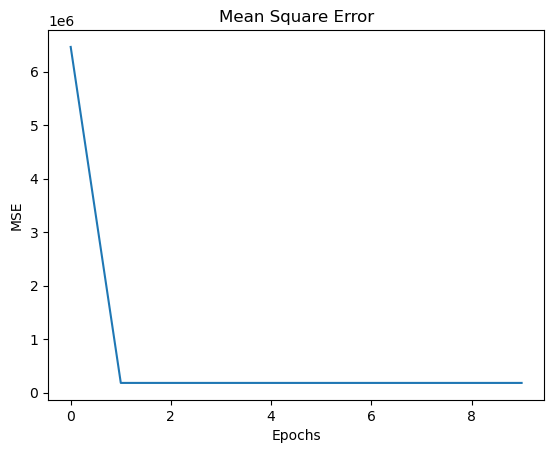

In [30]:
#SE ENTRENA LA REGRESIÓN CON LOS DATOS ANTERIORMENTE CREADOS, SE ESTABLCEN PESOS Y BIAS INICIALES IGUALES A 0,
#SE ESTABLCE UN RATE DE APRENDIZAJE MUY PEQUEÑO Y SE SELECCIONAN 1000 EPOCHS PARA EL ENTRENAMIENTO
w1, w2, b, Error=train_and_plot(X, y2, 0, 0, 0, 1*10**-7, 1000)

In [ ]:
#SE OBSERVA COMO ES QUE LA REGRESIÓN DE SEGUNDO ORDEN VA AJUSTANDO LOS PESOS Y EL BIAS A TRAVES DE LAS EPOCHS HASTA QUE AL 
#FINAL SE AJUSTA LO MEJOR POSIBLE, EN DICHAS FIGURAS TAMBIEN SE OBSERVA CUALES SON LOS PESOS QUE SE VAN UTILIZANDO PARA 
#EL AJUSTE DE ACUERDO A LA FUNCÓN ROJA, EL MSE Y LA EPOCH A LA QUE CORRESPONDE. EN LA GRAFICAS DE LA DATA DE PRUEBA Y LA FUNCIÓN
#OBTENIDA NO VARIA MUCHO DESPUES DE LA EPOCH 100 Y ESTO SE PUEDE CORROBORAR TAMBIEN EN LA GRAFICA DEL MSE DONDE SE VE UNA 
#REDUCCIÓN ABRUPTA EN EL ERROR DESDE EL INICIO HASTA LA EPOCH ANTERIORMENTE MENCIONADA. POSTERIOR A DICHA ITERACIÓN SE 
#OBSERVA COMO ES QUE LA PENDIENTE EN EL ERROR ES CASI NULA PERO EXISTENTE DEBIDO A QUE LOS PESOS SE SEIGUEN AJUSTANDO PERO DE 
#FORMA MINIMA

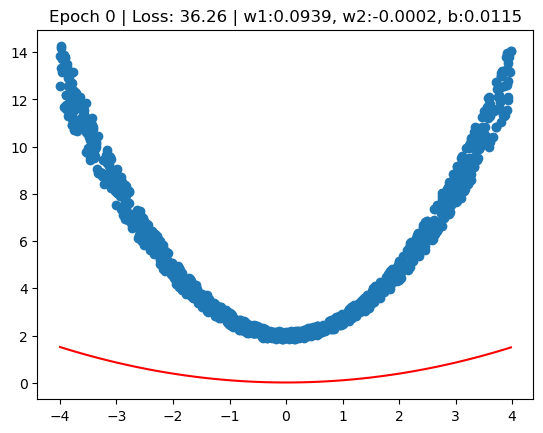

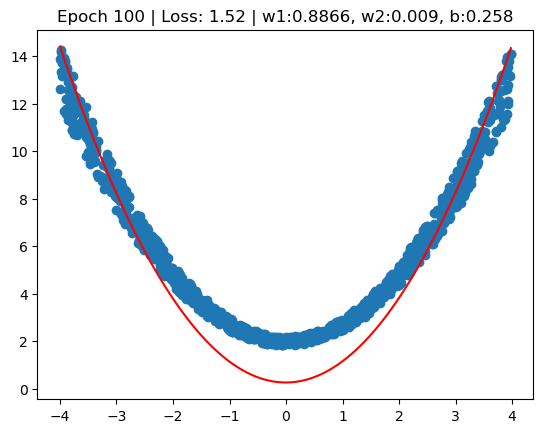

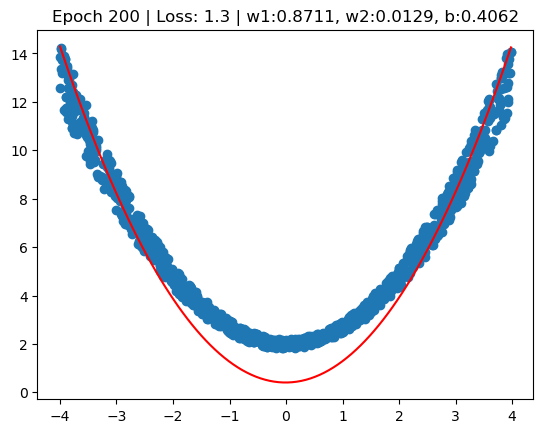

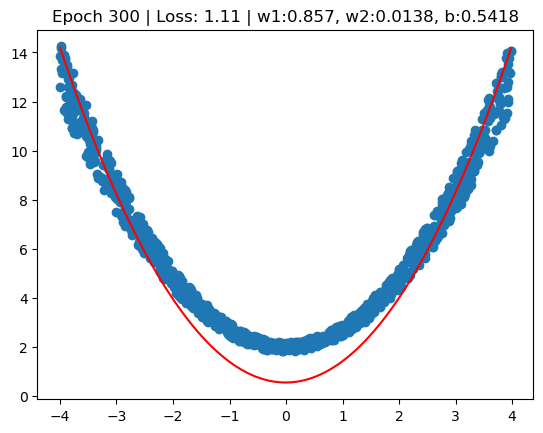

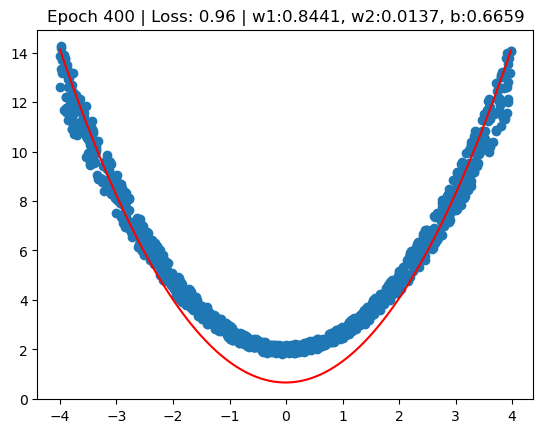

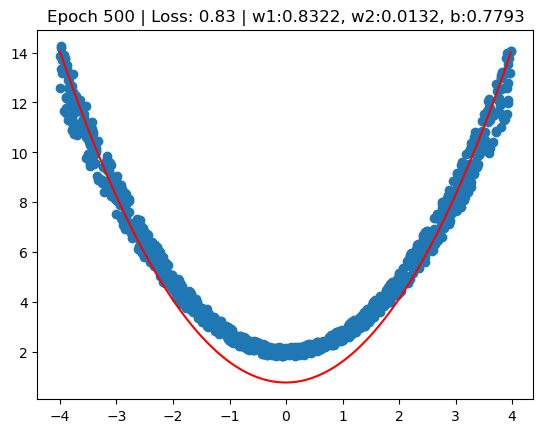

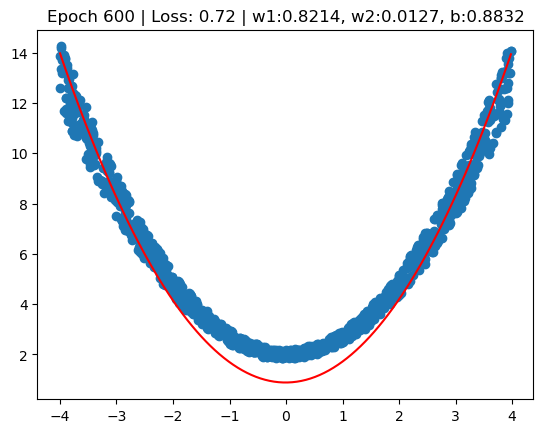

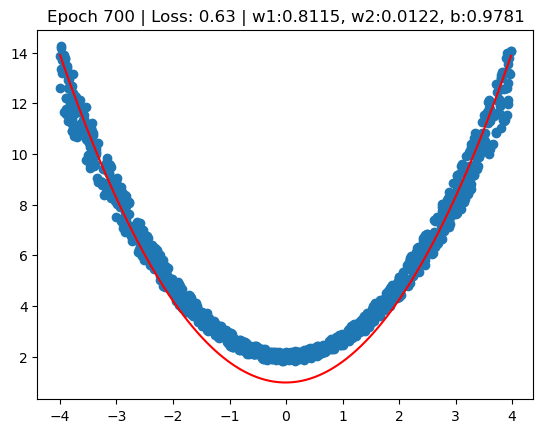

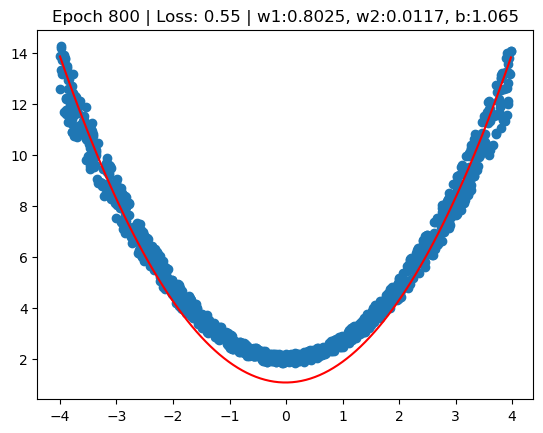

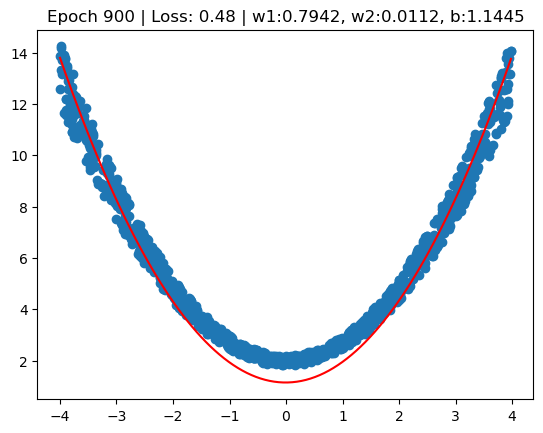

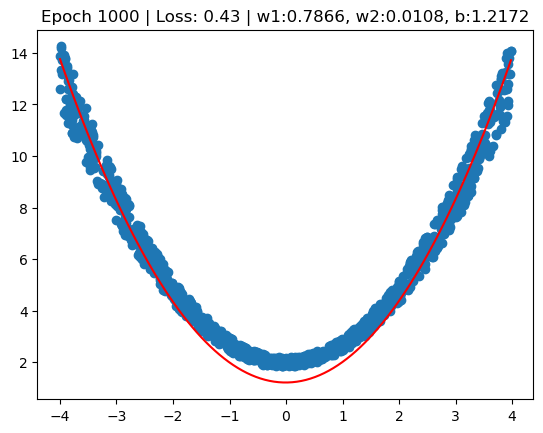

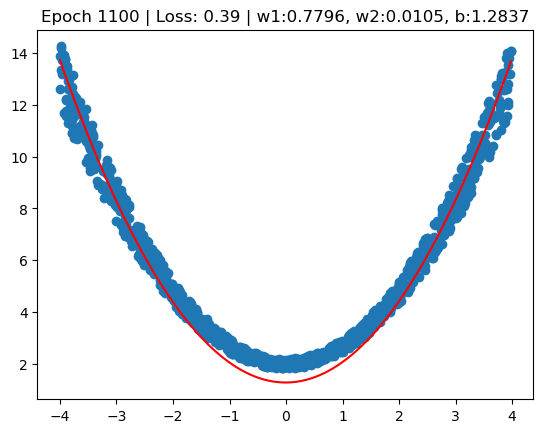

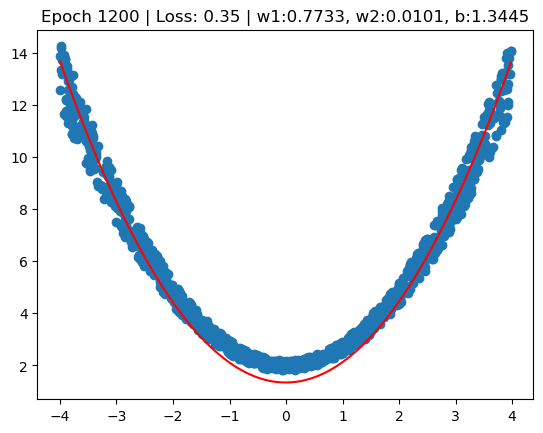

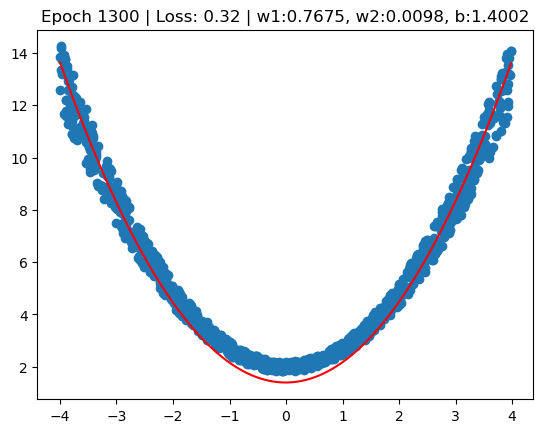

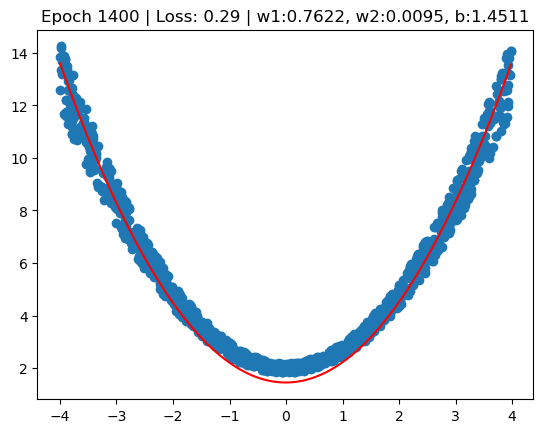

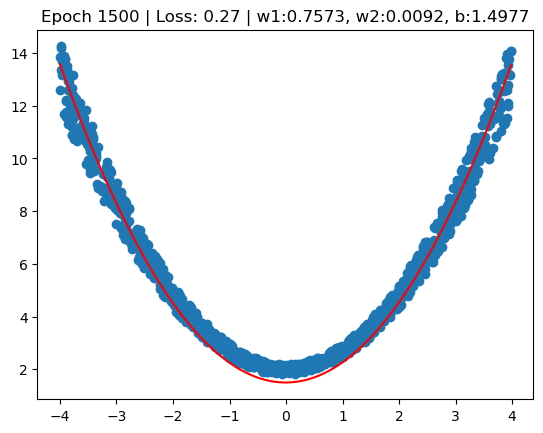

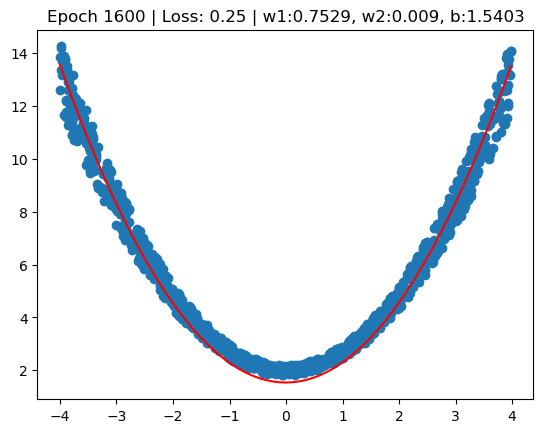

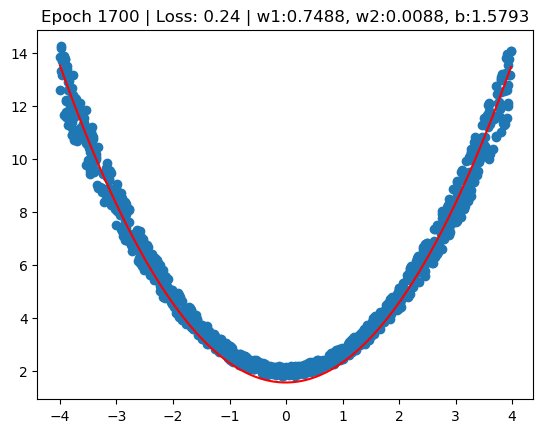

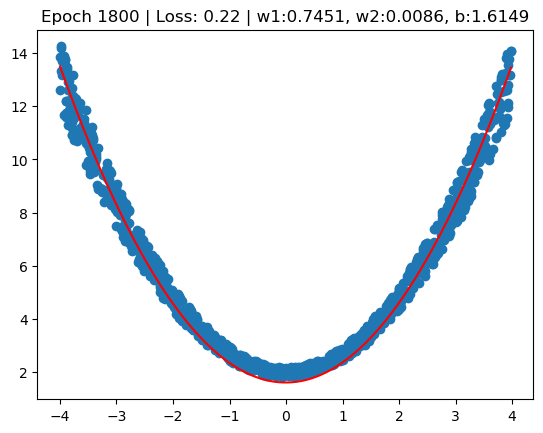

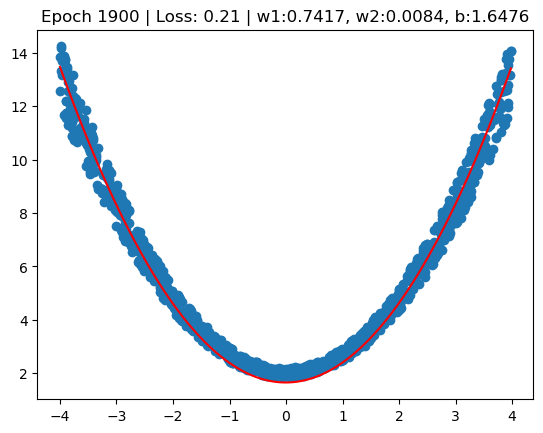

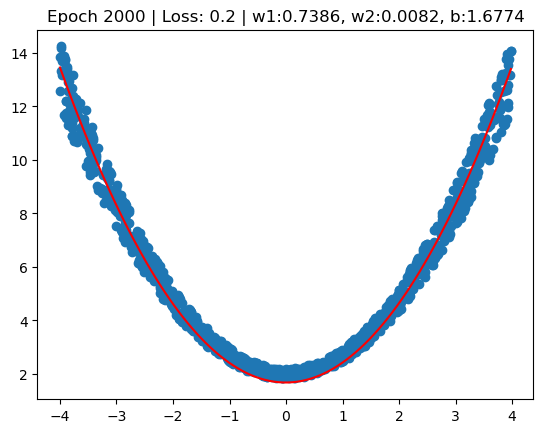

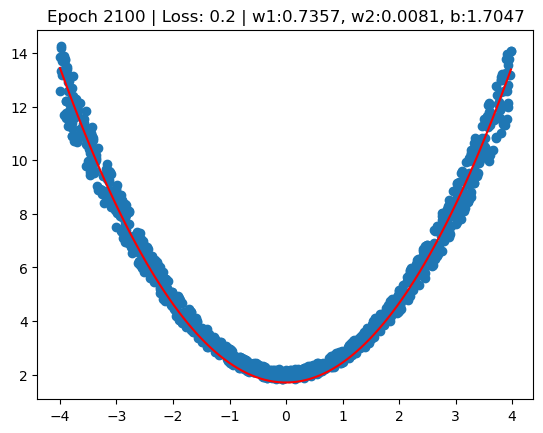

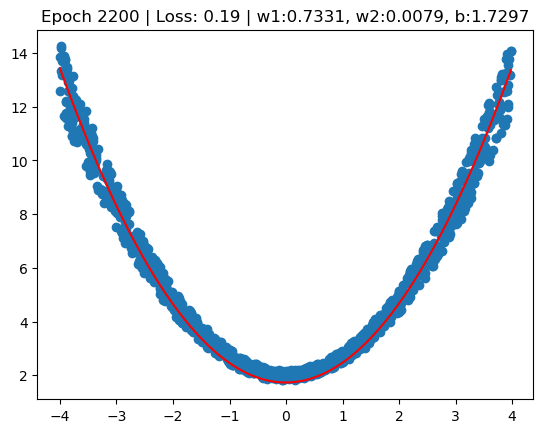

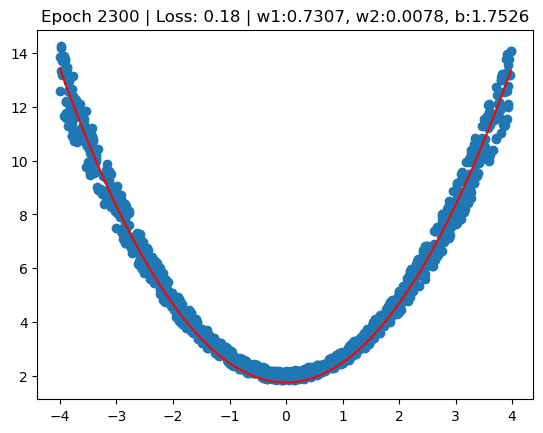

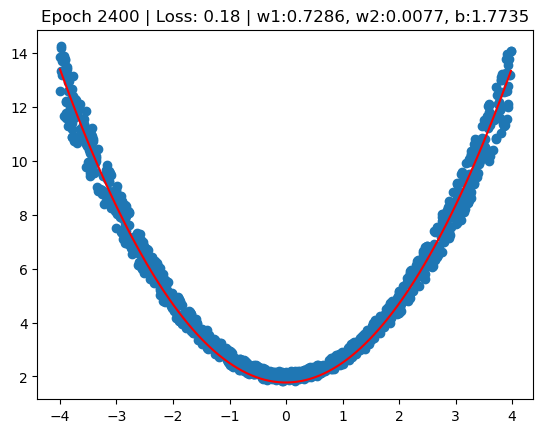

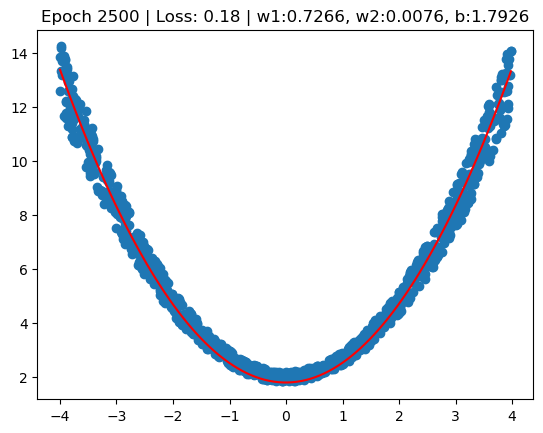

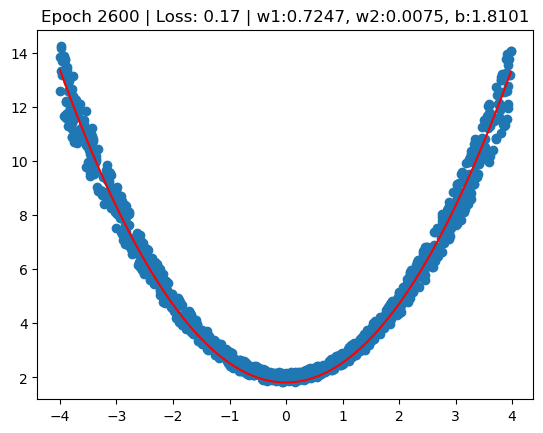

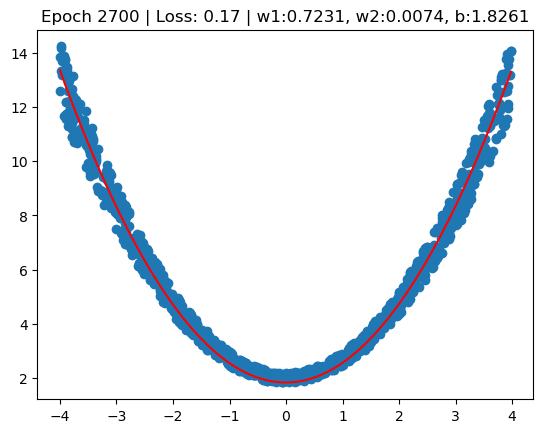

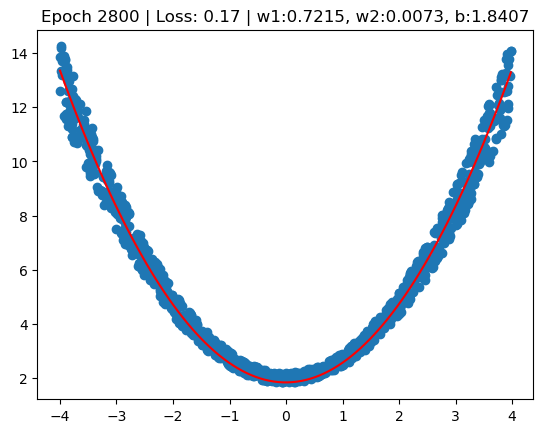

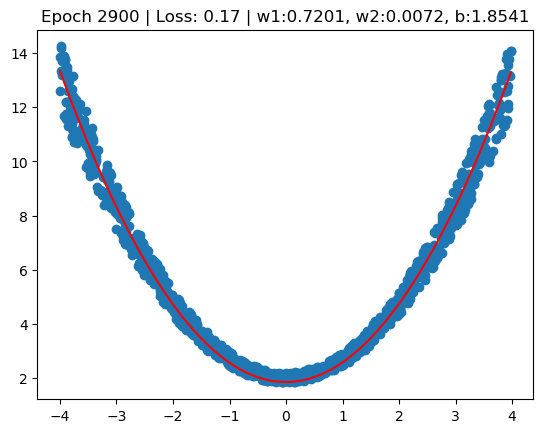

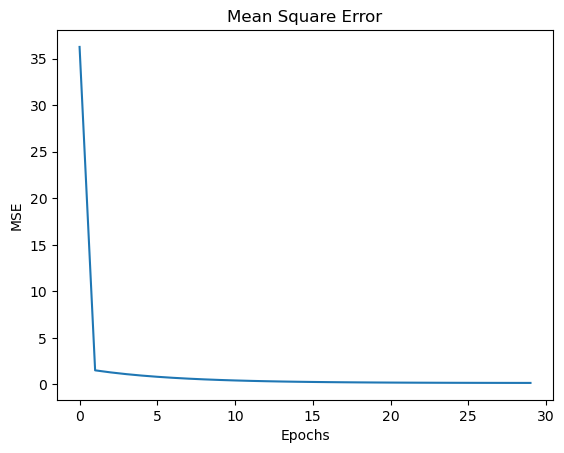

In [34]:
mat = scipy.io.loadmat('Polinomio2.mat')
x = mat['x'][0]
y=mat['y'][0]
w1=0
w2=0
b=0
alpha=1*10**-3
epochs=3000
w1, w2, b, Error=train_and_plot(x, y, w1, w2, b, alpha, epochs)

In [37]:
#SE CARGARON DATOS AJENOS A LOS QUE ESTABAN DENTRO DEL EJEMPLO Y SE REALIZO UN AREGRESIÓN DE SEGUNDO ORDEN PARA QUE SE 
#SE PUDIERA AJUSTAR, SE REALIZARON ALGUNAS PRUEBAS CON LA CONFIGURACIÓN DE HIPERPARAMETROS UTILIZADOS PARA EL EJEMPLO, 
#SE DESCUBRIO QUE LA RAZÓN DE APRENDIZAJE ERA MUY PEQUEÑA POR LO QUE NO SE LOGRABA UN AJUSTE CORRECTO POR LO QUE SE 
#DECIDIÓ UTILIZAR UN ALPHA=1*10^-3 Y 3000 EPOCHS, SE OBSERVA COMO ES QUE ERROR DISMINUYE DRASTICAMENTE DESDE EL INICIO HASTA 
#LA EPOCH 250 Y POSTERIORMENTE SIGUE DISMINUYENDO PERO CON MENOR PENDIENTE HASTA EL FINAL DEL ENTRENAMIENTO.
#AL FINAL SE OBTUVIERON LOS SIGUIENTES PESOS DE LA REGRESIÓN SIENDO MUY SIMILARES A LOS RALES
print('w1=',w1)
print('w2=',w2)
print('b=',b)

w1= 0.7188818988214088
w2= 0.007159374369602102
b= 1.8662586046271477


In [ ]:
#SE PUEDE CONCLUIR QUE EN ESTE MODELO DE REGRESIÓN CUADRATICA ES COMPLETAMENTE NECESARIO PODER ESTABLCER LOS HIPERPARAMETROS
#CORRECTOS YA QUE EL EXISTO DE LA REGRESÓN DEPENDE DE ELLO, ES POR ELLO QUE SE DEBEN DE TENER CONOCIMIENTO SOBRE COMO ES QUE 
#ESTOS TIENEN INFLUENCIA DENTRO DEL ALGORITMO Y COMO ES QUE UN USO CORRECTO PUEDE SER DETERMINANTE PARA OBTENER PESOS Y BIAS 
#MUCHO MAS CERCANOS A LOS QUE PRESENTA LA DATA REAL